# KNN Model

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

## Load the Data

In [2]:
data = pd.read_csv('data_cleaned.csv')
data.shape

(891, 25)

In [3]:
data.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,7.2500,0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,38.0,71.2833,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,1,26.0,7.9250,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,35.0,53.1000,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,0,35.0,8.0500,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1


### Segregating variables: Independent and Dependent variables

In [4]:
# Separating the independent and dependent variables
x = data.drop(['Survived'], axis=1)
y = data['Survived']
x.shape, y.shape

((891, 24), (891,))

### Scaling the data (Using Minmax Scaler)

In [5]:
# importing the MinMax Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [6]:
type(x_scaled)

numpy.ndarray

In [7]:
# Converting the array x to pandas df
x = pd.DataFrame(x_scaled, columns = x.columns)

In [8]:
type(x)

pandas.core.frame.DataFrame

![image](Image%201.png)

In [9]:
# Importing the train test split function
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x,y, random_state = 56, stratify=y)

**What are train_x, test_x, train_y, test_y?**<br>
train_x, train_y ===== This are the data from which the model will learn.<br>
test_x, test_y ===== This are the data with which our model will be tested

## Implementing KNN Classifier

In [10]:
# WIll Start from here

In [11]:
# importing KNN classifier and metric F1score
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import f1_score   # Evaluation Metric for this MOdel

**What are Evaluation Metrics?**<br>
Evaluation metrics are used to measure the quality of the statistical or machine learning model

In [12]:
# Creating instance of KNN
clf = KNN(n_neighbors = 10)

#Fitting the model
clf.fit(train_x, train_y)

#Predicting over the Train Set and calculating F1
test_predict = clf.predict(test_x)
k = f1_score(test_predict, test_y)
print('Test F1 Score:    ',k)

Test F1 Score:     0.6956521739130435


**What is an Instance?**<br>
A single object from which a model will be learned, or on which a model will be used (e.g., for prediction). In most machine learning work, instances are described by feature vectors;

**What is F1 Score?**<br>
F1 Score is an evaluation metric

### Elbow for Classifier

In [13]:
def Elbow(k):
    # Initiating Empty list
    test_error = []
    
    #Training model for every value of K
    for i in k:
        # Instance on KNN
        clf = KNN(n_neighbors = i)
        clf.fit(train_x, train_y)
        # Appending F1 scores to empty list claculated using the predictions
        tmp = clf.predict(test_x)
        tmp = f1_score(tmp, test_y)
        error = 1-tmp
        test_error.append(error)
        
    return test_error

In [14]:
# Defining K range
k = range(6, 20, 2)
k

range(6, 20, 2)

In [15]:
# Calling above defined function
test = Elbow(k)
test

[0.33333333333333326,
 0.2993630573248408,
 0.30434782608695654,
 0.2962962962962963,
 0.2962962962962963,
 0.29999999999999993,
 0.3125]

Text(0.5, 1.0, 'Elbow curve for test')

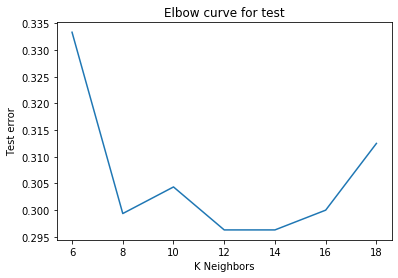

In [16]:
# PLotting the Curves
plt.plot(k, test)
plt.xlabel('K Neighbors')
plt.ylabel('Test error')
plt.title('Elbow curve for test')

In [17]:
# Creating instanace of KNN
clf = KNN(n_neighbors = 12)

# Fitting the model
clf.fit(train_x, train_y)

#Predicting over the Train Set and calculating F1
test_predict = clf.predict(test_x)
k = f1_score(test_predict, test_y)
print('Test F1 SCore    ', k)

Test F1 SCore     0.7037037037037037


# Implementing KNN Regression

### Importing the data

In [18]:
data = pd.read_csv('train_cleaned.csv')
data.shape

(8523, 46)

In [19]:
data.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,443.4228,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,1999,2097.2700,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,732.3800,0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,1987,994.7052,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0


### Segregating variables: Independent and Dependent Variables

In [20]:
#seperating independent and dependent variables
x = data.drop(['Item_Outlet_Sales'], axis=1)
y = data['Item_Outlet_Sales']
x.shape, y.shape

((8523, 45), (8523,))

### Scaling the data (Using MinMax Scaler)

In [21]:
# Importing MinMax Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [22]:
x = pd.DataFrame(x_scaled)

<img src="Image 1.png"  style="width:600px;" align="center">

In [23]:
# Importing Train test split
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 56)

### Implementing KNN Regressor

In [24]:
#importing KNN regressor and metric mse

from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.metrics import mean_squared_error as mse

In [25]:
# Creating instance of KNN
reg = KNN(n_neighbors = 5)

# Fitting the model
reg.fit(train_x, train_y)

# Predicting over the Train Set and calculating MSE
test_predict = reg.predict(test_x)
k = mse(test_predict, test_y)
print('Test MSE    ', k )

Test MSE     1714854.6015010108


### Elbow for Classifier

In [26]:
def Elbow(K):
  #initiating empty list
    test_mse = []
  
  #training model for evey value of K
    for i in K:
        #Instance of KNN
        reg = KNN(n_neighbors = i)
        reg.fit(train_x, train_y)
        #Appending mse value to empty list claculated using the predictions
        tmp = reg.predict(test_x)
        tmp = mse(tmp,test_y)
        test_mse.append(tmp)
    
    return test_mse

In [27]:
#Defining K range
k = range(1,40)

In [28]:
# calling above defined function
test = Elbow(k)

Text(0.5, 1.0, 'Elbow Curve for test')

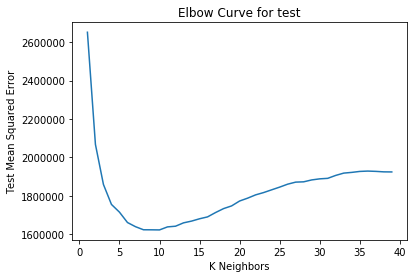

In [29]:
# plotting the Curves
plt.plot(k, test)
plt.xlabel('K Neighbors')
plt.ylabel('Test Mean Squared Error')
plt.title('Elbow Curve for test')

In [30]:
# Creating instance of KNN
reg = KNN(n_neighbors = 9)

# Fitting the model
reg.fit(train_x, train_y)

# Predicting over the Train Set and calculating F1
test_predict = reg.predict(test_x)
k = mse(test_predict, test_y)
print('Test MSE    ', k )

Test MSE     1622957.615752187


**THE END**